<a href="https://colab.research.google.com/github/mikakia/Project-in-HealthCare/blob/FirstStep/Healthcare_Risk_Factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import  missingno as msno

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA

from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score,cross_val_predict


#Exploring the Dataset

In [2]:
url = "https://raw.githubusercontent.com/mikakia/Project-in-HealthCare/main/dirty_v3_path.csv"
df = pd.read_csv(url)
df.head()

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426


In [3]:
df.shape

(30000, 20)

In [4]:
#df.iloc[0:3, 2:4]
df.iloc[[0, 1337]]
#df.iloc[:, [0]]

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1337,23.0,Male,Asthma,82.34,118.38,26.51,78.68,4,191.01,164.52,5.55,0,0,7.03,3.56,0,3.67,6.81,lorem,28.123059


In [5]:
df[['Gender', 'BMI']]
#df.BMI

,Gender,BMI
0,Male,28.90
1,Male,26.29
2,NaN,22.53
3,NaN,38.47
4,Female,31.12
...,...,...
29995,Female,28.30
29996,Male,24.93
29997,Female,30.55
29998,Male,23.57


In [6]:
df.dtypes

,0
Age,float64
Gender,object
Medical Condition,object
Glucose,float64
Blood Pressure,float64
BMI,float64
Oxygen Saturation,float64
LengthOfStay,int64
Cholesterol,float64
Triglycerides,float64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                25500 non-null  float64
 1   Gender             25500 non-null  object 
 2   Medical Condition  25500 non-null  object 
 3   Glucose            25500 non-null  float64
 4   Blood Pressure     25500 non-null  float64
 5   BMI                30000 non-null  float64
 6   Oxygen Saturation  30000 non-null  float64
 7   LengthOfStay       30000 non-null  int64  
 8   Cholesterol        30000 non-null  float64
 9   Triglycerides      30000 non-null  float64
 10  HbA1c              30000 non-null  float64
 11  Smoking            30000 non-null  int64  
 12  Alcohol            30000 non-null  int64  
 13  Physical Activity  30000 non-null  float64
 14  Diet Score         30000 non-null  float64
 15  Family History     30000 non-null  int64  
 16  Stress Level       300

#Preprocessing

##Checking correlation and missing values

In [8]:
#columns' names to lower case
df.columns = ['age', 'gender', 'medical_condition', 'glucose', 'blood_pressure',
       'bmi', 'oxygen_saturation', 'lengthofstay', 'cholesterol',
       'triglycerides', 'hba1c', 'smoking', 'alcohol', 'physical_activity',
       'diet_score', 'family_history', 'stress_level', 'sleep_hours',
       'random_notes', 'noise_col']
df.head()

,age,gender,medical_condition,glucose,blood_pressure,bmi,oxygen_saturation,lengthofstay,cholesterol,triglycerides,hba1c,smoking,alcohol,physical_activity,diet_score,family_history,stress_level,sleep_hours,random_notes,noise_col
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426


In [9]:
df.describe()

,age,glucose,blood_pressure,bmi,oxygen_saturation,lengthofstay,cholesterol,triglycerides,hba1c,smoking,alcohol,physical_activity,diet_score,family_history,stress_level,sleep_hours,noise_col
count,25500.000000,25500.000000,25500.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,54.616784,123.622179,140.455337,28.476155,94.954992,4.414133,213.033891,176.837375,6.294377,0.279767,0.238533,3.803214,4.029654,0.439433,5.917312,6.229836,-0.517010
std,15.973618,41.576943,21.077933,5.728804,3.736202,2.761536,33.519757,48.812827,1.320269,0.448892,0.426194,2.011729,1.817165,0.496326,2.225057,1.187669,100.076959
min,10.000000,20.320000,74.240000,7.670000,67.510000,1.000000,95.730000,-22.480000,3.280000,0.000000,0.000000,-3.680000,-1.750000,0.000000,-2.440000,1.590000,-412.169596
25%,45.000000,96.280000,125.140000,24.590000,93.000000,3.000000,189.500000,141.280000,5.330000,0.000000,0.000000,2.350000,2.770000,0.000000,4.370000,5.410000,-68.270749
50%,55.000000,110.500000,138.320000,28.050000,95.300000,4.000000,211.835000,173.365000,5.970000,0.000000,0.000000,3.590000,3.790000,0.000000,5.900000,6.230000,-0.510742
75%,66.000000,136.610000,153.790000,31.810000,97.380000,5.000000,235.310000,208.630000,6.920000,1.000000,0.000000,5.060000,5.020000,1.000000,7.440000,7.050000,66.811399
max,89.000000,318.510000,226.380000,56.850000,110.070000,19.000000,358.370000,421.510000,12.360000,1.000000,1.000000,12.410000,12.060000,1.000000,15.450000,10.350000,467.894910


###Check for outliers in noise_col

In [10]:
print("Min value:", df['noise_col'].min())
print("Max value:", df['noise_col'].max())

Min value: -412.1695960009927
Max value: 467.8949100376724


In [11]:
df.corr(numeric_only=True)

,age,glucose,blood_pressure,bmi,oxygen_saturation,lengthofstay,cholesterol,triglycerides,hba1c,smoking,alcohol,physical_activity,diet_score,family_history,stress_level,sleep_hours,noise_col
age,1.000000,0.117522,0.325402,-0.011306,0.077035,0.110510,0.177479,0.109877,0.101566,0.061329,0.044674,-0.123842,-0.165724,0.115076,0.170411,-0.082379,-0.005644
glucose,0.117522,1.000000,0.055369,0.073653,-0.001803,0.231057,0.005763,0.067150,0.614375,-0.044221,-0.022379,-0.236447,-0.310729,0.152690,0.070625,-0.125035,-0.005051
blood_pressure,0.325402,0.055369,1.000000,0.072683,0.009387,0.037274,0.260067,0.186207,0.047022,0.115888,0.067201,-0.137457,-0.193494,0.111301,0.221543,-0.150193,0.003011
bmi,-0.011306,0.073653,0.072683,1.000000,0.066021,0.001351,0.131115,0.186505,0.125447,-0.002459,0.040261,-0.346375,-0.296641,0.057824,-0.012055,-0.022468,0.000827
oxygen_saturation,0.077035,-0.001803,0.009387,0.066021,1.000000,-0.145913,-0.023322,-0.009648,-0.007675,-0.045577,0.011794,-0.016846,0.025911,-0.000745,-0.105826,0.167804,-0.005611
lengthofstay,0.110510,0.231057,0.037274,0.001351,-0.145913,1.000000,0.100028,0.080654,0.240723,0.094633,0.031196,-0.183073,-0.241152,0.051304,0.264238,-0.253759,0.001976
cholesterol,0.177479,0.005763,0.260067,0.131115,-0.023322,0.100028,1.000000,0.178466,0.025627,0.081800,0.064311,-0.208002,-0.220512,0.075586,0.162524,-0.135107,-0.004616
triglycerides,0.109877,0.067150,0.186207,0.186505,-0.009648,0.080654,0.178466,1.000000,0.089357,0.059926,0.047892,-0.258722,-0.254156,0.065852,0.101146,-0.112659,0.008894
hba1c,0.101566,0.614375,0.047022,0.125447,-0.007675,0.240723,0.025627,0.089357,1.000000,-0.045991,-0.018405,-0.284669,-0.345530,0.150820,0.056337,-0.124423,0.002478
smoking,0.061329,-0.044221,0.115888,-0.002459,-0.045577,0.094633,0.081800,0.059926,-0.045991,1.000000,0.034497,-0.022837,-0.038187,0.017032,0.108368,-0.085964,0.004599


In [12]:
df.select_dtypes(exclude=['number']).head()

,gender,medical_condition,random_notes
0,Male,Diabetes,lorem
1,Male,Healthy,ipsum
2,NaN,Asthma,ipsum
3,NaN,Obesity,lorem
4,Female,Hypertension,lorem


## Plots

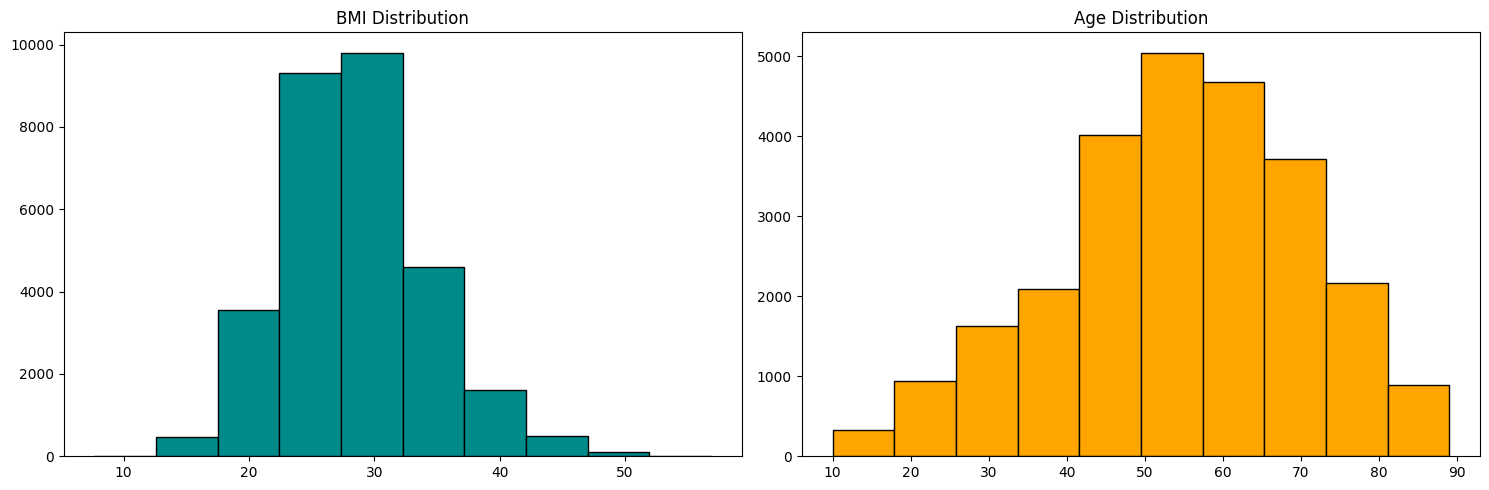

In [13]:
#SUBPLOTS

fig, axes = plt.subplots(1, 2, figsize=(15, 5)) #1 row,2 plots

# BMI
axes[0].hist(df['bmi'], bins=10, color='darkcyan', edgecolor='black')
axes[0].set_title('BMI Distribution')

# Age
axes[1].hist(df['age'], bins=10, color='orange', edgecolor='black')
axes[1].set_title('Age Distribution')

plt.tight_layout()
plt.show()

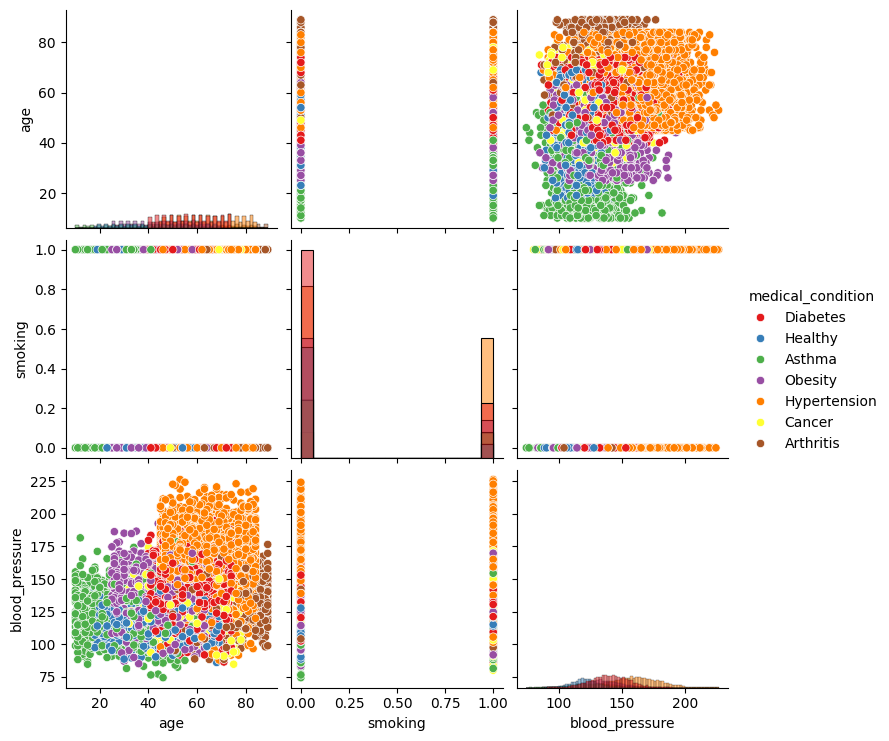

In [14]:
#Pairplots
numeric_cols = ['age', 'smoking', 'blood_pressure']

sns.pairplot(df, vars=numeric_cols, hue='medical_condition', diag_kind='hist', palette='Set1')
plt.show()

## Find and replace missing values

In [15]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                25500 non-null  float64
 1   gender             25500 non-null  object 
 2   medical_condition  25500 non-null  object 
 3   glucose            25500 non-null  float64
 4   blood_pressure     25500 non-null  float64
 5   bmi                30000 non-null  float64
 6   oxygen_saturation  30000 non-null  float64
 7   lengthofstay       30000 non-null  int64  
 8   cholesterol        30000 non-null  float64
 9   triglycerides      30000 non-null  float64
 10  hba1c              30000 non-null  float64
 11  smoking            30000 non-null  int64  
 12  alcohol            30000 non-null  int64  
 13  physical_activity  30000 non-null  float64
 14  diet_score         30000 non-null  float64
 15  family_history     30000 non-null  int64  
 16  stress_level       300

,0
age,4500
gender,4500
medical_condition,4500
glucose,4500
blood_pressure,4500
bmi,0
oxygen_saturation,0
lengthofstay,0
cholesterol,0
triglycerides,0


<Axes: >

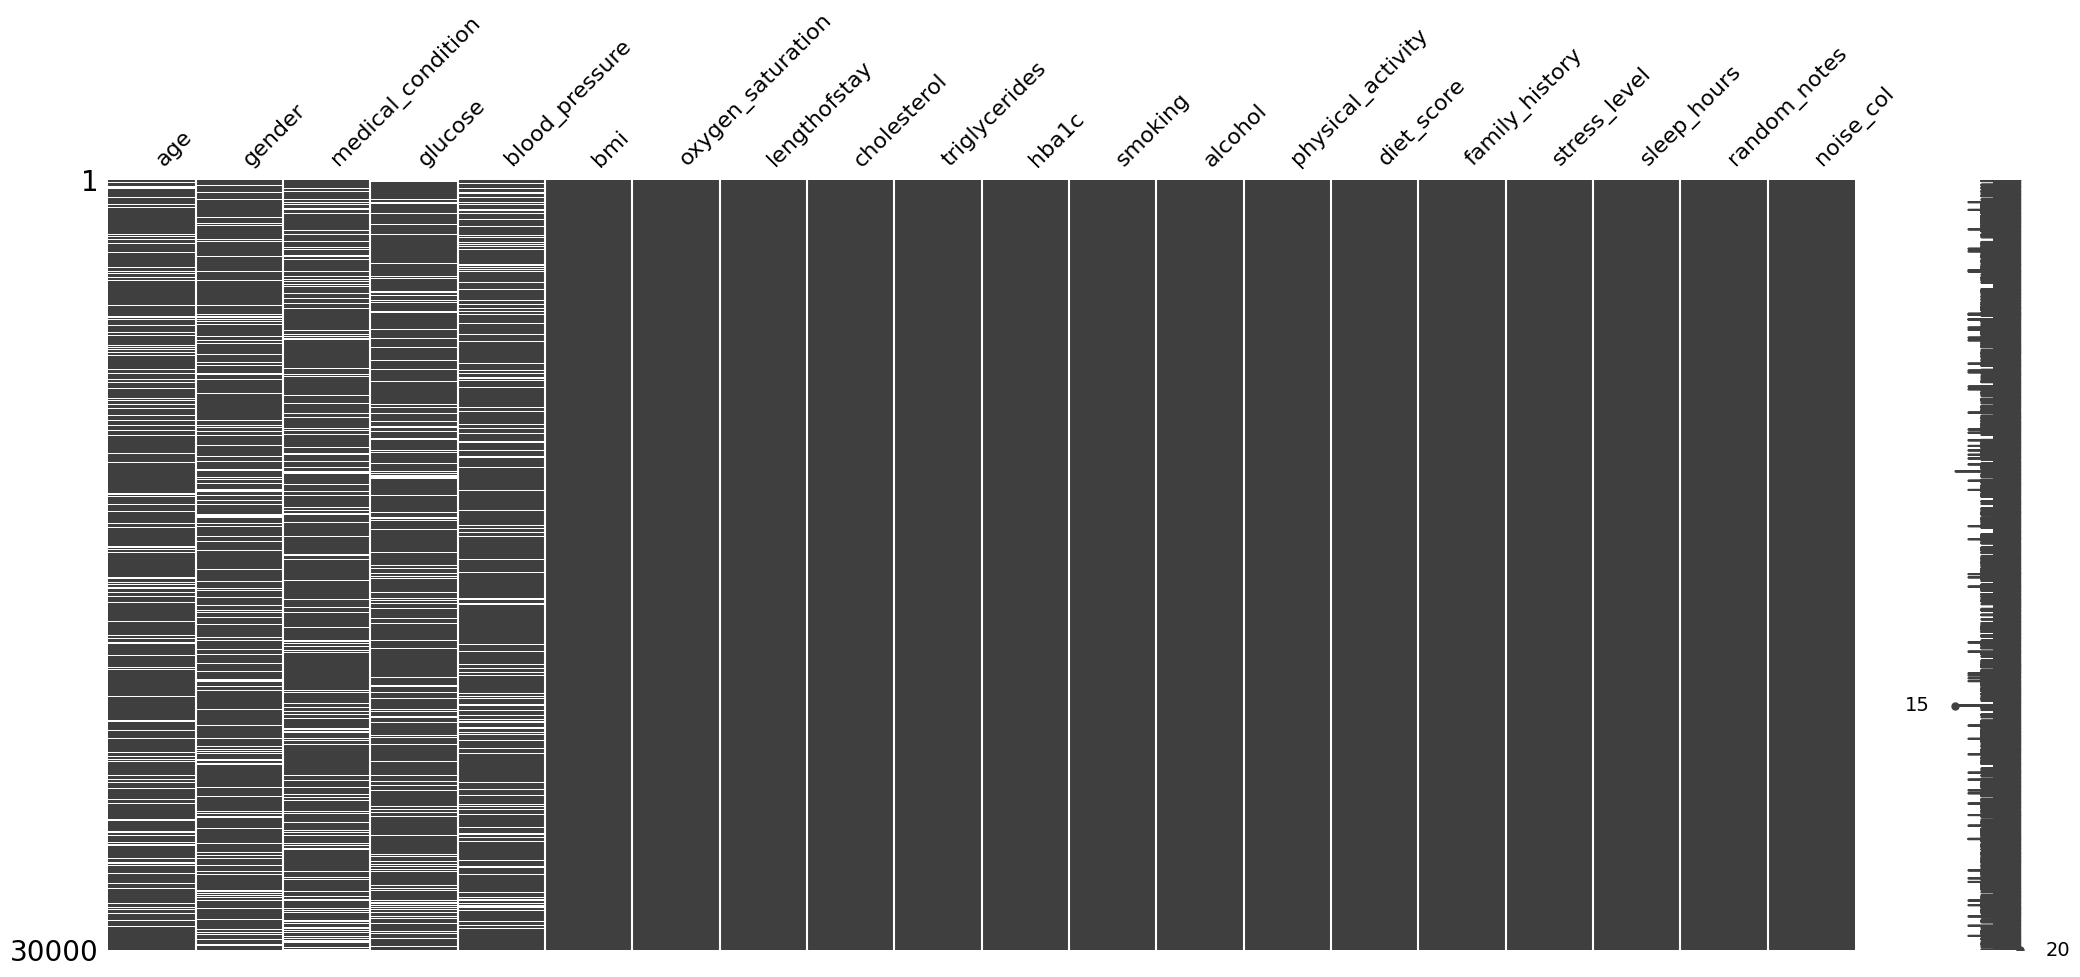

In [16]:
msno.matrix(df)

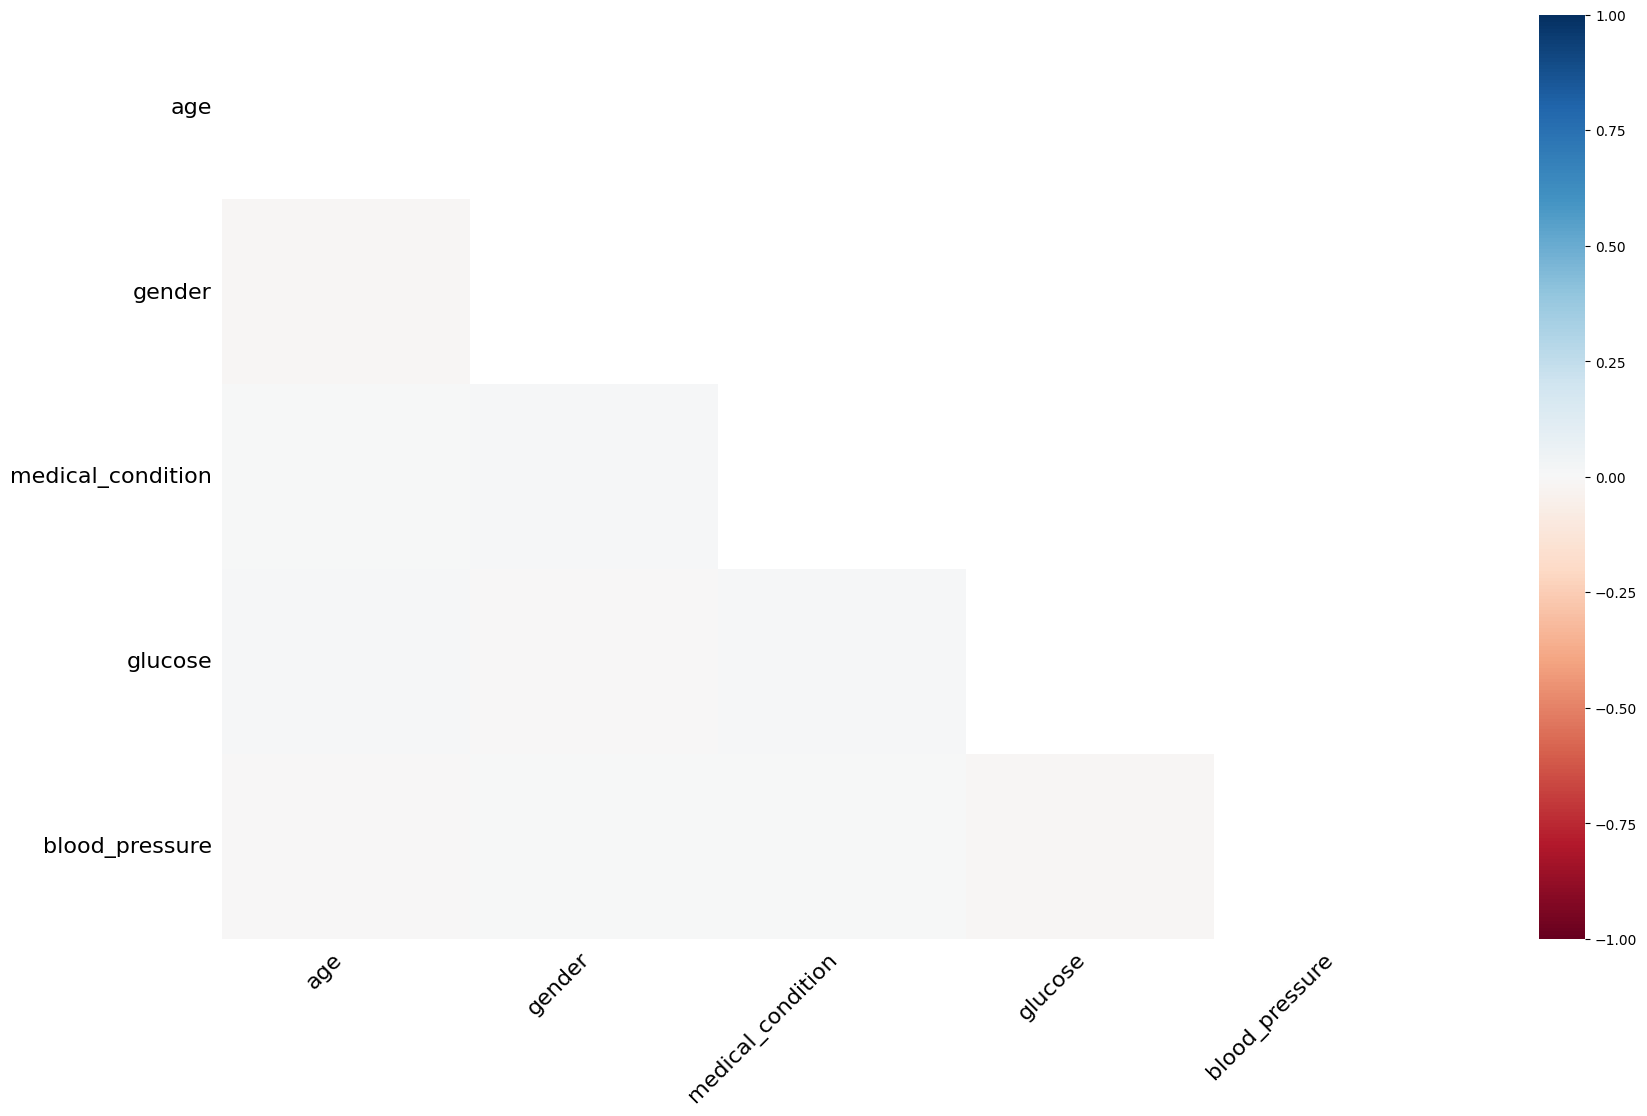

In [17]:
msno.heatmap(df)
plt.show()


In [18]:
# skew()< 0.5-> mean, else median
df['age'].skew() #mean
#gender ->mode
df['glucose'].skew() #median
#medical_condition -> mode
df['blood_pressure'].skew() #mean

np.float64(0.46500678008810137)

In [19]:
#fill missing values
df_clean = df.copy()
mode_cols = ['gender', 'medical_condition']
df_clean[mode_cols] = df_clean[mode_cols].fillna(df_clean[mode_cols].mode().iloc[0])

df_clean['age'] = df_clean['age'].fillna(df_clean['age'].mean())
df_clean['glucose'] = df_clean['glucose'].fillna(df_clean['glucose'].median())
df_clean['blood_pressure'] = df_clean['blood_pressure'].fillna(df_clean['blood_pressure'].mean())

In [20]:
# Check sum missing values in the dataset
print(df_clean.isna().sum())

age                  0
gender               0
medical_condition    0
glucose              0
blood_pressure       0
bmi                  0
oxygen_saturation    0
lengthofstay         0
cholesterol          0
triglycerides        0
hba1c                0
smoking              0
alcohol              0
physical_activity    0
diet_score           0
family_history       0
stress_level         0
sleep_hours          0
random_notes         0
noise_col            0
dtype: int64


## Convert categorical values to numerical by labeling

In [21]:
df_clean['gender'] = LabelEncoder().fit_transform(df_clean['gender'])
df_clean.head()


,age,gender,medical_condition,glucose,blood_pressure,bmi,oxygen_saturation,lengthofstay,cholesterol,triglycerides,hba1c,smoking,alcohol,physical_activity,diet_score,family_history,stress_level,sleep_hours,random_notes,noise_col
0,46.0,1,Diabetes,137.04,135.270000,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,1,Healthy,71.58,113.270000,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
2,50.0,0,Asthma,95.24,140.455337,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195
3,57.0,0,Obesity,110.50,130.530000,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175
4,66.0,0,Hypertension,95.15,178.170000,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426


In [22]:
df_clean.dtypes

,0
age,float64
gender,int64
medical_condition,object
glucose,float64
blood_pressure,float64
bmi,float64
oxygen_saturation,float64
lengthofstay,int64
cholesterol,float64
triglycerides,float64


In [23]:
df_clean['random_notes'].unique()

array(['lorem', 'ipsum', '###', '??'], dtype=object)

In [24]:
df_clean['medical_condition'].unique()

array(['Diabetes', 'Healthy', 'Asthma', 'Obesity', 'Hypertension',
       'Cancer', 'Arthritis'], dtype=object)

In [25]:

df_clean['medical_condition'] = LabelEncoder().fit_transform(df_clean['medical_condition'])
df_clean['random_notes'] = LabelEncoder().fit_transform(df_clean['random_notes'])
df_clean.head()


,age,gender,medical_condition,glucose,blood_pressure,bmi,oxygen_saturation,lengthofstay,cholesterol,triglycerides,hba1c,smoking,alcohol,physical_activity,diet_score,family_history,stress_level,sleep_hours,random_notes,noise_col
0,46.0,1,3,137.04,135.270000,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,3,-137.057211
1,22.0,1,4,71.58,113.270000,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,2,-11.230610
2,50.0,0,1,95.24,140.455337,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,2,98.331195
3,57.0,0,6,110.50,130.530000,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,3,44.187175
4,66.0,0,5,95.15,178.170000,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,3,44.831426


In [26]:
df_clean['family_history'].head()

,family_history
0,0
1,0
2,1
3,0
4,0


##Normalize the values

In [27]:
#standarlization
scaler = StandardScaler()
standard_scaled_data = scaler.fit_transform(df_clean[['age', 'glucose','blood_pressure','bmi', 'oxygen_saturation', 'cholesterol',
       'triglycerides', 'hba1c','diet_score','stress_level', 'sleep_hours','noise_col']])

df_scaled = pd.DataFrame(standard_scaled_data, columns=['age', 'glucose','blood_pressure','bmi', 'oxygen_saturation', 'cholesterol',
       'triglycerides', 'hba1c','diet_score','stress_level', 'sleep_hours','noise_col'])
df_scaled

,age,glucose,blood_pressure,bmi,oxygen_saturation,cholesterol,triglycerides,hba1c,diet_score,stress_level,sleep_hours,noise_col
0,-0.585115,0.398433,-2.668382e-01,0.073986,0.290409,0.562248,0.690867,0.996497,-0.269465,-0.380811,-0.151421,-1.364375
1,-2.214812,-1.296692,-1.398961e+00,-0.381614,0.691893,-1.416021,-0.971633,-1.048574,1.029283,-0.021263,1.254717,-0.107055
2,-0.313498,-0.684002,1.462585e-15,-1.037957,-1.243260,0.056866,-0.235339,-0.525945,0.341387,-1.270691,-1.187081,0.987738
3,0.161830,-0.288836,-5.107593e-01,1.744520,0.440296,-0.457168,0.108429,0.473868,-0.363019,-1.306645,-0.757661,0.446706
4,0.772967,-0.686333,1.940802e+00,0.461508,-0.014719,1.387149,-1.249434,-0.238120,-0.346509,0.207948,0.345358,0.453143
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.041882,-0.914214,-6.574207e-01,-0.030750,-0.159253,0.166057,-0.492038,-1.094020,3.478193,-1.019007,2.088296,0.900231
29996,-0.924635,-0.839376,7.160506e-01,-0.619015,0.298438,-0.439566,-0.000561,-0.707729,-0.346509,0.360756,-2.879499,-0.053435
29997,1.927336,-0.288836,1.526033e+00,0.362009,0.769513,-0.086634,-0.165479,-0.942533,0.258840,-0.722381,-2.205900,-0.303947
29998,-0.924635,3.138964,6.440064e-01,-0.856416,1.128172,-0.124522,0.970512,0.981349,-0.792266,0.531541,-0.361921,0.055981


In [28]:
df.columns = ['age', 'gender', 'medical_condition', 'glucose', 'blood_pressure',
       'bmi', 'oxygen_saturation', 'lengthofstay', 'cholesterol',
       'triglycerides', 'hba1c', 'smoking', 'alcohol', 'physical_activity',
       'diet_score', 'family_history', 'stress_level', 'sleep_hours',
       'random_notes', 'noise_col']

In [29]:
# combined data (scaled and rest)
df_complete = df_clean.copy()
df_complete[['age', 'glucose','blood_pressure','bmi', 'oxygen_saturation', 'cholesterol',
       'triglycerides', 'hba1c','diet_score','stress_level', 'sleep_hours','noise_col']] = df_scaled[['age', 'glucose','blood_pressure','bmi', 'oxygen_saturation', 'cholesterol',
       'triglycerides', 'hba1c','diet_score','stress_level', 'sleep_hours','noise_col']]

df_complete.head()


,age,gender,medical_condition,glucose,blood_pressure,bmi,oxygen_saturation,lengthofstay,cholesterol,triglycerides,hba1c,smoking,alcohol,physical_activity,diet_score,family_history,stress_level,sleep_hours,random_notes,noise_col
0,-0.585115,1,3,0.398433,-2.668382e-01,0.073986,0.290409,6,0.562248,0.690867,0.996497,0,0,-0.20,-0.269465,0,-0.380811,-0.151421,3,-1.364375
1,-2.214812,1,4,-1.296692,-1.398961e+00,-0.381614,0.691893,2,-1.416021,-0.971633,-1.048574,0,0,8.12,1.029283,0,-0.021263,1.254717,2,-0.107055
2,-0.313498,0,1,-0.684002,1.462585e-15,-1.037957,-1.243260,2,0.056866,-0.235339,-0.525945,0,0,5.01,0.341387,1,-1.270691,-1.187081,2,0.987738
3,0.161830,0,6,-0.288836,-5.107593e-01,1.744520,0.440296,5,-0.457168,0.108429,0.473868,0,0,3.16,-0.363019,0,-1.306645,-0.757661,3,0.446706
4,0.772967,0,5,-0.686333,1.940802e+00,0.461508,-0.014719,4,1.387149,-1.249434,-0.238120,0,1,3.56,-0.346509,0,0.207948,0.345358,3,0.453143


In [30]:
df_complete.shape

(30000, 20)

# Training and Test Phase

In [31]:
X = df_complete.drop('medical_condition', axis=1)  # all features except medical condition and noise_col
y = df_complete['medical_condition']               # target

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [33]:
X_notscaled = df_clean.drop('medical_condition', axis=1)
y_notscaled = df_clean['medical_condition']

In [34]:
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X_notscaled, y_notscaled, test_size=0.2, random_state=42, stratify=y_notscaled)

## SVM



###SVC with rbd kernel removing one column
Accuracy: 82%

In [35]:
# Remove column noise_col because of outliers
df_rm1c = df_complete.drop('noise_col', axis=1)
df_rm1c.head()

,age,gender,medical_condition,glucose,blood_pressure,bmi,oxygen_saturation,lengthofstay,cholesterol,triglycerides,hba1c,smoking,alcohol,physical_activity,diet_score,family_history,stress_level,sleep_hours,random_notes
0,-0.585115,1,3,0.398433,-2.668382e-01,0.073986,0.290409,6,0.562248,0.690867,0.996497,0,0,-0.20,-0.269465,0,-0.380811,-0.151421,3
1,-2.214812,1,4,-1.296692,-1.398961e+00,-0.381614,0.691893,2,-1.416021,-0.971633,-1.048574,0,0,8.12,1.029283,0,-0.021263,1.254717,2
2,-0.313498,0,1,-0.684002,1.462585e-15,-1.037957,-1.243260,2,0.056866,-0.235339,-0.525945,0,0,5.01,0.341387,1,-1.270691,-1.187081,2
3,0.161830,0,6,-0.288836,-5.107593e-01,1.744520,0.440296,5,-0.457168,0.108429,0.473868,0,0,3.16,-0.363019,0,-1.306645,-0.757661,3
4,0.772967,0,5,-0.686333,1.940802e+00,0.461508,-0.014719,4,1.387149,-1.249434,-0.238120,0,1,3.56,-0.346509,0,0.207948,0.345358,3


In [36]:
X1 = df_rm1c.drop('medical_condition', axis=1)
y1 = df_rm1c['medical_condition']

In [37]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)


In [38]:
svm_model_1 = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm_model_1.fit(X_train_1, y_train_1)

SVC(probability=True, random_state=42)

In [39]:
y_pred1s = svm_model_1.predict(X_test_1)

print("Classification Report:")
print(classification_report(y_test_1, y_pred1s))

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.60      0.64       359
           1       0.82      0.87      0.84       407
           2       0.81      0.95      0.88       247
           3       0.83      0.92      0.87      1283
           4       0.86      1.00      0.92       608
           5       0.84      0.72      0.77      2324
           6       0.77      0.85      0.81       772

    accuracy                           0.82      6000
   macro avg       0.80      0.84      0.82      6000
weighted avg       0.82      0.82      0.81      6000



###SVC with rbf kernel
Accuracy: 82%

In [40]:
svm_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [41]:
y_pred = svm_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.58      0.63       359
           1       0.82      0.87      0.84       407
           2       0.81      0.94      0.87       247
           3       0.83      0.92      0.87      1283
           4       0.86      1.00      0.92       608
           5       0.84      0.72      0.77      2324
           6       0.78      0.86      0.81       772

    accuracy                           0.82      6000
   macro avg       0.80      0.84      0.82      6000
weighted avg       0.82      0.82      0.82      6000



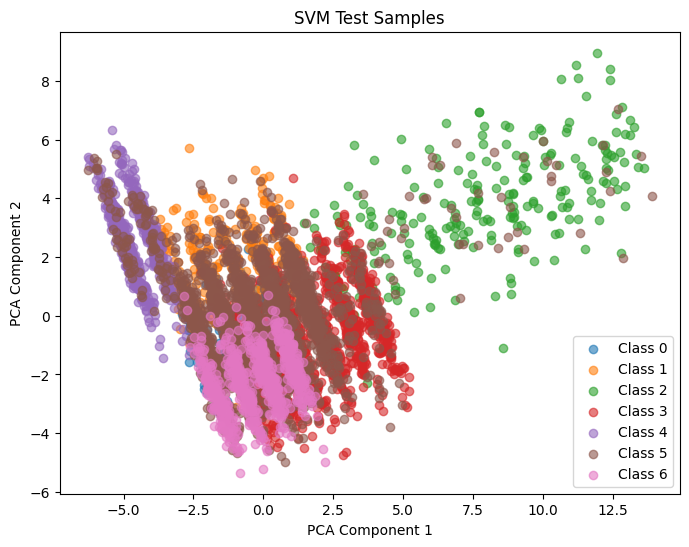

In [42]:
# to 2D
pca = PCA(n_components=2)
X_test_2d = pca.fit_transform(X_test)

# samples
plt.figure(figsize=(8,6))
for class_label in np.unique(y_test):
    plt.scatter(
        X_test_2d[y_test==class_label, 0],
        X_test_2d[y_test==class_label, 1],
        label=f"Class {class_label}",
        alpha=0.6
    )


plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("SVM Test Samples")
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


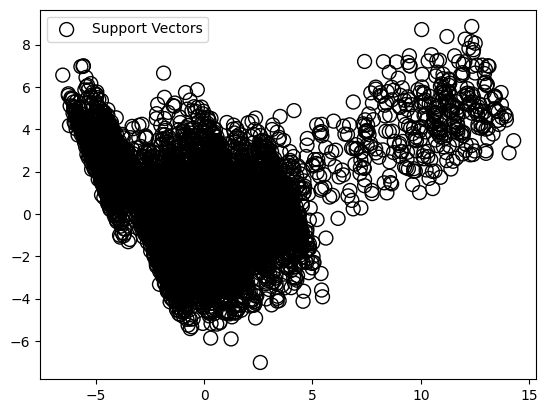

In [43]:
sv = svm_model.support_vectors_
sv_2d = pca.transform(sv)
plt.scatter(sv_2d[:,0], sv_2d[:,1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.legend()
plt.show()


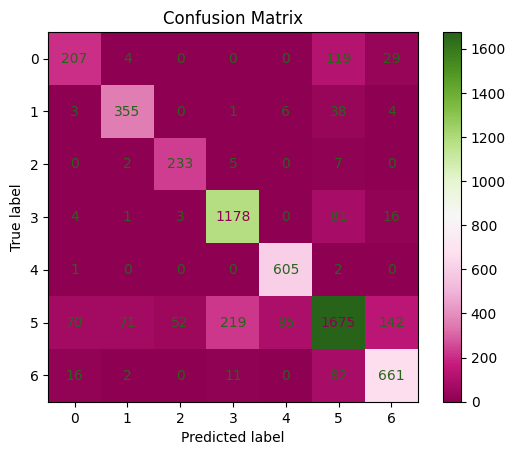

In [44]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))

disp.plot(cmap='PiYG')
plt.title("Confusion Matrix")
plt.show()


In [45]:
# 25 first predictios
for true, pred in zip(y_test[:25], y_pred[:20]):
    print(f"True: {true} → Predicted: {pred}")


True: 3 → Predicted: 3
True: 2 → Predicted: 2
True: 5 → Predicted: 5
True: 5 → Predicted: 5
True: 6 → Predicted: 6
True: 6 → Predicted: 6
True: 4 → Predicted: 4
True: 5 → Predicted: 5
True: 3 → Predicted: 3
True: 2 → Predicted: 2
True: 6 → Predicted: 6
True: 1 → Predicted: 1
True: 5 → Predicted: 3
True: 4 → Predicted: 4
True: 5 → Predicted: 3
True: 3 → Predicted: 3
True: 1 → Predicted: 1
True: 5 → Predicted: 5
True: 5 → Predicted: 5
True: 5 → Predicted: 3


In [46]:
# orinala labels
original_labels = df['medical_condition']
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(original_labels)


print(le.classes_)




['Arthritis' 'Asthma' 'Cancer' 'Diabetes' 'Healthy' 'Hypertension'
 'Obesity' nan]


In [47]:
y_pred_named = le.inverse_transform(y_pred)
y_test_named = le.inverse_transform(y_test)

# 30 predictions
for true, pred in zip(y_test_named[:30], y_pred_named[:20]):
    print(f"Actual: {true} → Predicted: {pred}")


Actual: Diabetes → Predicted: Diabetes
Actual: Cancer → Predicted: Cancer
Actual: Hypertension → Predicted: Hypertension
Actual: Hypertension → Predicted: Hypertension
Actual: Obesity → Predicted: Obesity
Actual: Obesity → Predicted: Obesity
Actual: Healthy → Predicted: Healthy
Actual: Hypertension → Predicted: Hypertension
Actual: Diabetes → Predicted: Diabetes
Actual: Cancer → Predicted: Cancer
Actual: Obesity → Predicted: Obesity
Actual: Asthma → Predicted: Asthma
Actual: Hypertension → Predicted: Diabetes
Actual: Healthy → Predicted: Healthy
Actual: Hypertension → Predicted: Diabetes
Actual: Diabetes → Predicted: Diabetes
Actual: Asthma → Predicted: Asthma
Actual: Hypertension → Predicted: Hypertension
Actual: Hypertension → Predicted: Hypertension
Actual: Hypertension → Predicted: Diabetes


###SVC with linear kernel
Accuracy:79%

In [48]:
svm_model2 = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
svm_model2.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [49]:
y_pred2 = svm_model2.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred2))

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.41      0.51       359
           1       0.81      0.74      0.78       407
           2       0.82      0.79      0.80       247
           3       0.84      0.86      0.85      1283
           4       0.86      0.99      0.92       608
           5       0.73      0.75      0.74      2324
           6       0.80      0.79      0.79       772

    accuracy                           0.79      6000
   macro avg       0.79      0.76      0.77      6000
weighted avg       0.78      0.79      0.78      6000



###SVC with poly kernel

Accuracy: 80%

In [50]:
svm_model3 = SVC(kernel='poly', C=1.0, probability=True, random_state=42)
svm_model3.fit(X_train, y_train)

SVC(kernel='poly', probability=True, random_state=42)

In [51]:
y_pred3 = svm_model3.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred3))

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.41      0.51       359
           1       0.84      0.80      0.82       407
           2       0.82      0.77      0.79       247
           3       0.84      0.89      0.86      1283
           4       0.86      0.99      0.92       608
           5       0.78      0.74      0.76      2324
           6       0.74      0.87      0.80       772

    accuracy                           0.80      6000
   macro avg       0.79      0.78      0.78      6000
weighted avg       0.79      0.80      0.79      6000



###NuSVC
Accuracy: 51%

In [ ]:
model4 = NuSVC(nu=0.05, kernel='poly', probability=True)
model4.fit(X_train, y_train)

In [ ]:
y_pred4 = model4.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred4))

###LinearSVC

####hinge
Accuracy: 78%

In [ ]:
model_linearSVC = LinearSVC(loss='hinge', C=1.2, max_iter=2000)
model_linearSVC.fit(X_train, y_train)

In [ ]:
y_pred5 = model_linearSVC.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred5))

####squared_hinge

Accuracy:78%

In [ ]:
model_linearSVC2 = LinearSVC(loss='squared_hinge', C=3, max_iter=1000)
model_linearSVC2.fit(X_train, y_train)

In [ ]:
y_pred6 = model_linearSVC2.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred6))
print("Classification Report:")
print(classification_report(y_test, y_pred6))

##Logistic Regression
Accuracy: 78%

In [ ]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

In [ ]:
y_pred_log = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

##Random Forest
Accuracy: 82%

Changed n_estimators but there were not significant changes in accuracy

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100,max_depth=None,random_state=42)
rf_model.fit(X_train_ns, y_train_ns)

In [ ]:
y_pred_rf = rf_model.predict(X_test_ns)
print("Accuracy:", accuracy_score(y_test_ns, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test_ns, y_pred_rf))

In [ ]:
cm = confusion_matrix(y_test_ns, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='BuPu_r')
plt.title("Random Forest Confusion Matrix")
plt.show()

##GradientBoostingClassifier

Accuracy: 81%

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=60,learning_rate=0.1,max_depth=3,random_state=42)
gb_model.fit(X_train_ns, y_train_ns)

In [ ]:
y_pred_gb = gb_model.predict(X_test_ns)

print("Accuracy:", accuracy_score(y_test_ns, y_pred_gb))
print("Classification Report:\n", classification_report(y_test_ns, y_pred_gb))

In [ ]:
cm = confusion_matrix(y_test_ns, y_pred_gb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

##XGBoost Classifier
Accuracy: 81%

In [ ]:
xgb_model = XGBClassifier(n_estimators=100,max_depth=3,learning_rate=0.1,eval_metric='mlogloss',random_state=42)

xgb_model.fit(X_train_ns, y_train_ns)

In [ ]:
y_predxgb = xgb_model.predict(X_test_ns)

print("Accuracy:", accuracy_score(y_test_ns, y_predxgb))
print("Classification Report:\n", classification_report(y_test_ns, y_predxgb))

In [ ]:
cm = confusion_matrix(y_test, y_predxgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("XGBoost Confusion Matrix")
plt.show()

##Neural Network
Accuracy: 82%

In [ ]:

nn_model = MLPClassifier(hidden_layer_sizes=(16,8), activation='relu', max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)

In [ ]:
y_pred_nn = nn_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Classification Report:\n", classification_report(y_test, y_pred_nn))

##KNN
Accuracy: 80%

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=15, metric='minkowski')
knn_model.fit(X_train, y_train)

In [ ]:
y_pred_knn = knn_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matric\n",confusion_matrix(y_test, y_pred_knn))

###KNN with k folds
Accuracy: 80%

In [ ]:
kf = KFold(n_splits=8, shuffle=True, random_state=42)

In [ ]:
scores = cross_val_score(knn_model, X, y, cv=kf, scoring='accuracy')

print("Accuracy for each fold:", scores)
print("Mean accuracy:", scores.mean())

#Explainability XAI models

## SHAPE

## LIME